In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [6]:
np.random.seed (613)
x=np.arange(50)
y=np.random.randint(0,100,50)


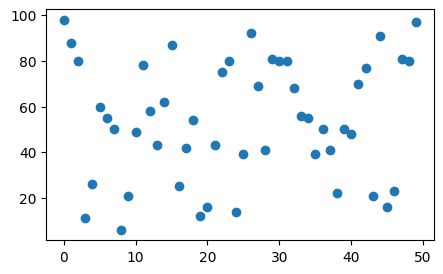

In [7]:
fig,ax=plt.subplots(figsize=(5,3))
ax.scatter(x,y)

<BarContainer object of 50 artists>

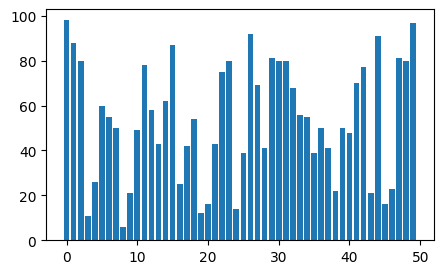

In [8]:
fig, ax=plt.subplots(figsize=(5,3))
ax.bar(x,y)

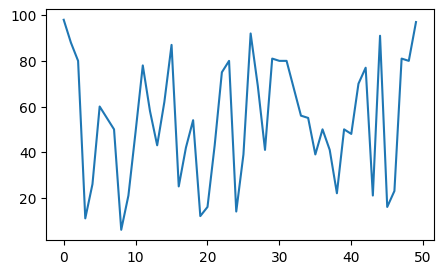

In [9]:
fig, ax=plt.subplots(figsize=(5,3))
ax.plot(x,y)

(array([4., 6., 2., 5., 7., 6., 4., 3., 9., 4.]),
 array([ 6. , 15.2, 24.4, 33.6, 42.8, 52. , 61.2, 70.4, 79.6, 88.8, 98. ]),
 <BarContainer object of 10 artists>)

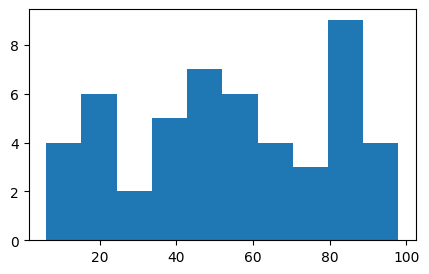

In [ ]:
fig, ax=plt.subplots(figsize=(5,3))
ax.hist(y) #hist only works with y, don't need x here

In [11]:
ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')
fig.tight_layout()

In [16]:
font1 = {'family':'sans-serif','color':'blue','size':20}
font2 = {'family':'monospace','color':'green','size':14}

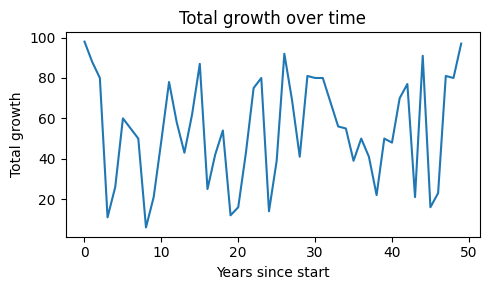

In [13]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y)
ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')
fig.tight_layout()


Text(0.5, 0, 'Years since start')

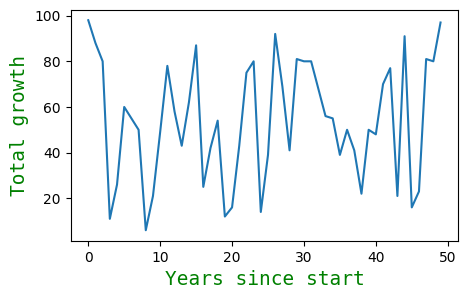

In [17]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y)
ax.set_ylabel('Total growth', fontdict = font2)
ax.set_xlabel('Years since start', fontdict = font2)

C:\Users\jmaha\AppData\Local\Temp\ipykernel_5992\22816053.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


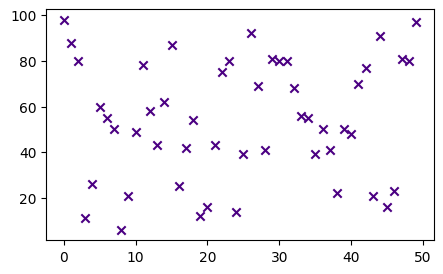

In [18]:
fig,ax=plt.subplots(figsize=(5,3))
ax.scatter(x,y,
           marker='x',
           color = "indigo")
fig.show()

Text(0.5, 0, 'Years since start')

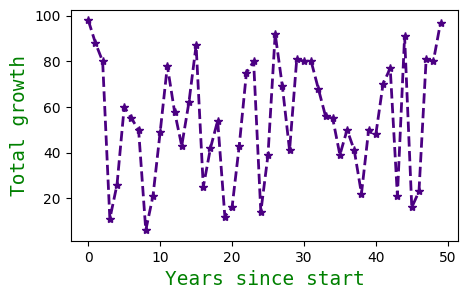

In [19]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y,
        marker='*',
        color = 'indigo',
        linestyle= '--',
        linewidth=2)
ax.set_ylabel('Total growth', fontdict = font2)
ax.set_xlabel('Years since start', fontdict = font2)

C:\Users\jmaha\AppData\Local\Temp\ipykernel_5992\4267821879.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


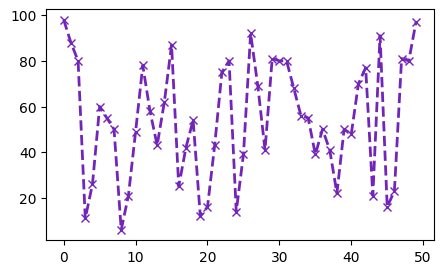

In [20]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(x,y,marker='x', color = '#7425b9', linestyle = '--', linewidth = 2)
fig.show()

Text(0.5, 0, 'Years since start')

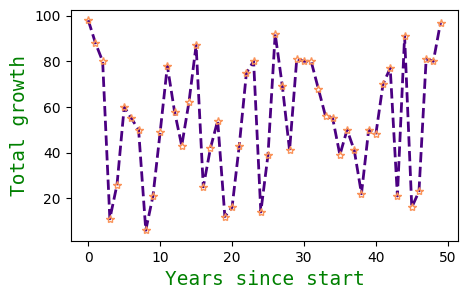

In [22]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x,y,
        marker='*',
        color = 'indigo',
        linestyle= '--',
        linewidth=2,
        markeredgecolor = '#fa9359',
        markerfacecolor = '#0000')
ax.set_ylabel('Total growth', fontdict = font2)
ax.set_xlabel('Years since start', fontdict = font2)

In [23]:
ax.grid(axis='y')

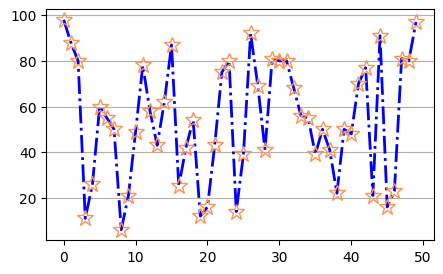

In [33]:
fig,ax=plt.subplots(figsize=(5,3))
ax.grid(axis = 'y')
ax.plot(x,y, marker='*', color = "blue", linewidth = 2, markersize=12, linestyle = '-.',markeredgecolor = '#fa9359',
        markerfacecolor = '#0000')

In [34]:
# getting necessary libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['year'] = pd.to_datetime(temp['Date']).dt.year # we store the year in a separate column

# Since we do not want to plot 50+ lines, we only select some years to plot
year_list = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
temp = temp[temp['year'].isin(year_list)]

# as we expect to plot histograms-like plots for each year, we group by year and mean temperature and aggregate with 'count' function
temp = temp.groupby(['year', 'Mean_TemperatureC']).agg({'Mean_TemperatureC': 'count'}).rename(columns={'Mean_TemperatureC': 'count'}).reset_index()

In [40]:
# the idea behind this ridgeline plot with Plotly is to add traces manually, each trace corresponding to a particular year's temperature distribution
# thus, we are to store each year's data (temperatures and their respective count) in seperate arrays or pd.series that we store in a dictionnary to retrieve them easily
array_dict = {} # instantiating an empty dictionnary
for year in year_list:
    array_dict[f'x_{year}'] = temp[temp['year']==year]['Mean_TemperatureC'] # storing the temperature data for each year
    array_dict[f'y_{year}'] = temp[temp['year']==year]['count'] # storing the temperature count for each year
    array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) \
                                / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min()) # we normalize the array (min max normalization)

# once all of this is done, we can create a plotly.graph_objects.Figure and add traces with fig.add_trace() method
# since we have stored the temperatures and their respective count for each year, we can plot scatterplots (go.Scatter)
# we thus iterate over year_list and create a 'blank line' that is placed at y = index, then the corresponding temperature count line
fig = go.Figure()
for index, year in enumerate(year_list):
    fig.add_trace(go.Scatter(
                            x=[-20, 40], y=np.full(2, len(year_list)-index),
                            mode='lines',
                            line_color='white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(year_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    # plotly.graph_objects' way of adding text to a figure
    fig.add_annotation(
                        x=-20,
                        y=len(year_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift=10)

# here you can modify the figure and the legend titles
fig.update_layout(
                title='Average temperature from 1950 until 2010 in Seattle',
                showlegend=False,
                xaxis=dict(title='Temperature in degree Celsius'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed